#### READ RAW OVS DATASETS

In [1]:
# Import libraries
import os
import zipfile
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
cwd = os.getcwd()

In [4]:
# Load 2016-2019 OVS datasets
combinedtable_zf = zipfile.ZipFile(cwd + '/Real Data/combinedtable_v5.zip')
OVS1619 = pd.read_csv(combinedtable_zf.open('combinedtable_v5.csv', pwd=b'OddVeilShark@1619'))

# Load data dictionary
data_dict = pd.read_excel(cwd + r'/Real Data/Data Dictionary for NUS_v5.xlsx',
                          sheet_name='Variable Information', header=1, nrows=266,engine='openpyxl')

In [5]:
# Exclude respondent_id, outlier, dummy, b4 and b13b1 from data_dict
data_dict = data_dict[~data_dict['Variable'].isin(['respondent_id', 'outlier', 'dummy', 'b4', 'b13b1'])]

In [6]:
# Rename the variable names in the data_dict as well
data_dict['Variable'].replace(to_replace={'c4.tot.new': 'Expenditure on Accommodation (c4.tot.new)',
                                          'c6.tot.new': 'Expenditure on F&B (c6.tot.new)',
                                          'c6c_1.r': 'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
                                          'c6c_2.r': 'Expenditure on Casual Dining (c6c_2.r)',
                                          'c7.tot.new': 'Expenditure on Transport (c7.tot.new)',
                                          'c10.tot.new': 'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
                                          'c10c_1.r': 'Expenditure on Sightseeing (c10c_1.r)',
                                          'c10c_2.r': 'Expenditure on Attractions (c10c_2.r)',
                                          't7.m.any': 'Expenditure on Shopping (t7.m.any)',
                                          't7.m.well': 'Expenditure on Healthcare & Wellness Products (t7.m.well)',
                                          't7.m.food': 'Expenditure on Confectionery & Food Items (t7.m.food)',
                                          't7.m.fash': 'Expenditure on Fashion (t7.m.fash)',
                                          'c1b.r': 'Package Expenditure Per Person (c1b.r)',
                                          'b13a_112': 'Main POV - Leisure/Holiday (b13a_112)',
                                          'b13a_114': 'Main POV - Visiting Friends/Family (b13a_114)',
                                          'b13a_116': 'Main POV - Business (b13a_116)',
                                          'b13a_117': 'Main POV - Healthcare (b13a_117)',
                                          'b13a_118': 'Main POV - Education/Training/Workshop (b13a_118)',
                                          'b13a_119': 'Main POV - Others (b13a_119)',
                                          'm1': 'Mode of Transport (m1)',
                                          'c1a': 'Travel Package (c1a)'}, inplace=True)

In [7]:
# Select all variables with nominal or ordinal measurement level
categorical_variables = data_dict.loc[(data_dict['Measurement Level']!='Scale') &
                                      (data_dict['Measurement Level'].notnull())]['Variable'].tolist()

#### BENCHMARKS

><u>Original</u>
>
>Identified 22 expenditure components are:
>
>1. Expenditure on Accommodation (c4.tot.new)
>2. <s>Expenditure on Hotels (c4d_1.r + c4d_2.r + c4d_3.r)*</s>
>3. <s>Expenditure on Service Apartment (c4d_6.r)*</s>
>4. <s>Expenditure on Other Accommodations (c4d_4.r + c4d_5.r + c4d_7.r + c4d_8.r)*</s>
>5. Expenditure on F&B (c6.tot.new)
>6. Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)
>7. Expenditure on Casual Dining (c6c_2.r)
>8. <s>Expenditure on Fine-dining, Celebrity Chef Restaurants (c6c_3.r)*</s>
>9. Expenditure on Transport (c7.tot.new)
>10. Expenditure on Sightseeing & Entertainment (c10.tot.new)
>11. Expenditure on Sightseeing (c10c_1.r)
>12. Expenditure on Attractions (c10c_2.r)
>13. <s>Expenditure on Entertainment or Nightspots (c10c_3.r)*</s>
>14. <s>Expenditure on Business (c11.tot.new)*</s>
>15. <s>Expenditure on Education (c12c_1.r)*</s>
>16. <s>Expenditure on Healthcare (c12c_2.r + c12c_3.r + c12c_4.r + c12c_5.r + c12c_6.r)*</s>
>17. Expenditure on Shopping (t7.m.any)
>18. Expenditure on Healthcare & Wellness Products (t7.m.well)
>19. Expenditure on Confectionery & Food Items (t7.m.food)
>20. <s>Expenditure on Fashion, Jewellery & Watches (t7.m.fash + t7.m.jew + t7.m.wat)*</s> Expenditure on Fashion (t7.m.fash)
>21. <s>Expenditure on Other Shopping Items (t7.m.gift + t7.m.ctec + t7.m.anti + t7.m.oth)*</s> Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)
>22. Package Expenditure Per Person (c1b.r)
>
>Identified 11 categorical components are:
>
>1. Main POV - Leisure/Holiday (b13a_112)
>2. Main POV - Visiting Friends/Family (b13a_114)
>3. Main POV - Business (b13a_116)
>4. Main POV - Healthcare (b113_117)
>5. Main POV - Education/Training/Workshop (b13a_118)
>6. Main POV - Others (b13a_119)
>7. Mode of Transport (m1)
>8. Travel Package (c1a)
>9. Accommodation - Hotels (c4a_1, c4a_2, c4a_3)
>10. Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)
>11. <s>Things Did - Others/None of the Above (c8a_14, c8a_15)*</s>

<u>Updated</u>

Identified 14 expenditure components are:

1. Expenditure on Accommodation (c4.tot.new)
2. Expenditure on F&B (c6.tot.new)
3. Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)
4. Expenditure on Casual Dining (c6c_2.r)
5. Expenditure on Transport (c7.tot.new)
6. Expenditure on Sightseeing & Entertainment (c10.tot.new)
7. Expenditure on Sightseeing (c10c_1.r)
8. Expenditure on Attractions (c10c_2.r)
9. Expenditure on Shopping (t7.m.any)
10. Expenditure on Healthcare & Wellness Products (t7.m.well)
11. Expenditure on Confectionery & Food Items (t7.m.food)
12. Expenditure on Fashion (t7.m.fash)
13. Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)
14. Package Expenditure Per Person (c1b.r)

Identified 10 categorical components are:

1. Main POV - Leisure/Holiday (b13a_112)
2. Main POV - Visiting Friends/Family (b13a_114)
3. Main POV - Business (b13a_116)
4. Main POV - Healthcare (b113_117)
5. Main POV - Education/Training/Workshop (b13a_118)
6. Main POV - Others (b13a_119)
7. Mode of Transport (m1)
8. Travel Package (c1a)
9. Accommodation - Hotels (c4a_1, c4a_2, c4a_3)
10. Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)

In [8]:
# Rename expenditure columns
OVS1619.rename(columns = {'c4.tot.new': 'Expenditure on Accommodation (c4.tot.new)',
                          'c6.tot.new': 'Expenditure on F&B (c6.tot.new)',
                          'c6c_1.r': 'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
                          'c6c_2.r': 'Expenditure on Casual Dining (c6c_2.r)',
                          'c7.tot.new': 'Expenditure on Transport (c7.tot.new)',
                          'c10.tot.new': 'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
                          'c10c_1.r': 'Expenditure on Sightseeing (c10c_1.r)',
                          'c10c_2.r': 'Expenditure on Attractions (c10c_2.r)',
                          't7.m.any': 'Expenditure on Shopping (t7.m.any)',
                          't7.m.well': 'Expenditure on Healthcare & Wellness Products (t7.m.well)',
                          't7.m.food': 'Expenditure on Confectionery & Food Items (t7.m.food)',
                          't7.m.fash': 'Expenditure on Fashion (t7.m.fash)',
                          'c1b.r': 'Package Expenditure Per Person (c1b.r)'}, inplace=True)

# Rename categorical columns
OVS1619.rename(columns = {'b13a_112': 'Main POV - Leisure/Holiday (b13a_112)',
                          'b13a_114': 'Main POV - Visiting Friends/Family (b13a_114)',
                          'b13a_116': 'Main POV - Business (b13a_116)',
                          'b13a_117': 'Main POV - Healthcare (b13a_117)',
                          'b13a_118': 'Main POV - Education/Training/Workshop (b13a_118)',
                          'b13a_119': 'Main POV - Others (b13a_119)',
                          'm1': 'Mode of Transport (m1)',
                          'c1a': 'Travel Package (c1a)'}, inplace=True)

In [9]:
# Convert these variables to data type = 'category' 
OVS1619[categorical_variables] = OVS1619[categorical_variables].astype('category')

In [10]:
# Sum expenditure components
def sum_expnd(component):
    if component.isnull().values.all(axis=0):
        output = np.nan
    else:
        output = component.sum(axis=0)
    return output

# Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)
shopoth = OVS1619.loc[:, ['t7.m.gift', 't7.m.oth']].apply(sum_expnd, axis=1)
OVS1619.insert(OVS1619.columns.get_loc('t7.m.oth')+1, 'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)', shopoth)

In [11]:
# Combine the categorical variables for Hotels, Other Accommodations and Things Did
# If any of the components equals 1, the overall is assigned a value of 1 else assigned a value of 0

# Accommodation - Hotels (c4a_1, c4a_2, c4a_3)
hotel = OVS1619.loc[:, 'c4a_1':'c4a_3'].apply(lambda x: 1 if (x==1).any() else 0, axis=1)
OVS1619.insert(OVS1619.columns.get_loc('c4a_3')+1, 'Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', hotel)

# Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)
accomoth = OVS1619.loc[:, ['c4a_4', 'c4a_5', 'c4a_7', 'c4a_8']].apply(lambda x: 1 if (x==1).any() else 0, axis=1)
OVS1619.insert(OVS1619.columns.get_loc('c4a_8')+1, 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)', accomoth)

In [12]:
# Convert new categorical variables to data type = 'category' 
OVS1619[['Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']] = OVS1619[['Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']].astype('category')

# Add the new categorical variables into the list of categorical variables
categorical_variables.extend(['Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)'])

In [13]:
# List of 14 expenditure variables
list_expnd = ['Expenditure on Accommodation (c4.tot.new)',
              'Expenditure on F&B (c6.tot.new)',
              'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
              'Expenditure on Casual Dining (c6c_2.r)',
              'Expenditure on Transport (c7.tot.new)', 
              'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
              'Expenditure on Sightseeing (c10c_1.r)',
              'Expenditure on Attractions (c10c_2.r)',
              'Expenditure on Shopping (t7.m.any)',          
              'Expenditure on Healthcare & Wellness Products (t7.m.well)',
              'Expenditure on Confectionery & Food Items (t7.m.food)',
              'Expenditure on Fashion (t7.m.fash)',
              'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)',
              'Package Expenditure Per Person (c1b.r)']

# List of 10 categorical variables
list_cat = ['Mode of Transport (m1)',
            'Main POV - Leisure/Holiday (b13a_112)',
            'Main POV - Visiting Friends/Family (b13a_114)',
            'Main POV - Business (b13a_116)',
            'Main POV - Healthcare (b13a_117)',
            'Main POV - Education/Training/Workshop (b13a_118)',
            'Main POV - Others (b13a_119)',
            'Travel Package (c1a)',
            'Accommodation - Hotels (c4a_1, c4a_2, c4a_3)',
            'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']

In [14]:
# Remove the test set year = 2019 from the dataframe
OVS1618 = OVS1619.drop(index=OVS1619[OVS1619.year==2019].index)

In [15]:
# Set output to 4 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.float_format', '{:.2E}'.format)

In [16]:
# Remove extreme outlier that exist in the column 'Package Expenditure Per Person' = 129,747,456
newOVS1618 = OVS1618.drop([41313])

In [17]:
def remove_outlier(df, list_cols):
    # Compute mean, median and std for original dataframe
    original_mean = df[list_cols].mean()
    original_median = df[list_cols].median()
    original_std = df[list_cols].std()

    # Set upper and lower limit to mean +/- 3 standard deviation
    lower_limit  = original_mean - (3 * original_std)
    upper_limit = original_mean + (3 * original_std)
    conditions = list(zip(list_cols, lower_limit, upper_limit))

    # dataframe to store outliers
    outliers_df = pd.DataFrame()
    outliers_count = pd.Series([], dtype = 'int64')
    
    # Keep only values within the respective cut-offs or NA values
    print(f'Original Shape: {df.shape}\n')
    for cond in conditions:
        print(f'{cond[0]}: Cut-off {cond[1], cond[2]}')
        outliers = df[(df[cond[0]] < cond[1]) | (df[cond[0]] > cond[2])]
        outliers_df = outliers_df.append(outliers)
        outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
        df = df[(df[cond[0]] > cond[1]) & (df[cond[0]] < cond[2]) | (df[cond[0]].isnull())]
        print(f'Cleaned df shape: {df.shape}')
        print(f'Outliers df shape: {outliers_df.shape}')

    # Compute new mean, median and std for cleaned dataframe
    new_mean = df[list_cols].mean()
    new_median = df[list_cols].median()
    new_std = df[list_cols].std()
    
    # Create a dataframe on statistics
    stats_df = pd.DataFrame({'Original Mean': original_mean, 'Original Median': original_median, 
                             'Original Standard Deviation': original_std, 'New Mean': new_mean, 'New Median': new_median, 
                             'New Standard Deviation': new_std, 'Outliers Removed': outliers_count})
    
    return df.reset_index(drop=True), outliers_df.reset_index(drop=True), stats_df

In [18]:
cleaned_OVS1618, outliers_df, outliers_stats = remove_outlier(newOVS1618, list_expnd)

Original Shape: (69466, 267)

Expenditure on Accommodation (c4.tot.new): Cut-off (-5750.799593747546, 7189.263925565634)
Cleaned df shape: (69382, 267)
Outliers df shape: (84, 267)
Expenditure on F&B (c6.tot.new): Cut-off (-847.1356890128628, 1413.5515743063966)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in

Cleaned df shape: (68849, 267)
Outliers df shape: (617, 267)
Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r): Cut-off (-296.5520973492023, 545.083622808465)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (68412, 267)
Outliers df shape: (1054, 267)
Expenditure on Casual Dining (c6c_2.r): Cut-off (-495.44336199467375, 988.6966606457247)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (67904, 267)
Outliers df shape: (1562, 267)
Expenditure on Transport (c7.tot.new): Cut-off (-238.64465679994015, 422.81115407207784)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (67632, 267)
Outliers df shape: (1834, 267)
Expenditure on Sightseeing & Entertainment (c10.tot.new): Cut-off (-466.0413922289273, 1000.6139582959562)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (67454, 267)
Outliers df shape: (2012, 267)
Expenditure on Sightseeing (c10c_1.r): Cut-off (-241.28872397822042, 558.5567943309951)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (67413, 267)
Outliers df shape: (2053, 267)
Expenditure on Attractions (c10c_2.r): Cut-off (-366.43751953367865, 792.0611011577641)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (67208, 267)
Outliers df shape: (2258, 267)
Expenditure on Shopping (t7.m.any): Cut-off (-1498.027433704236, 2148.1126152205716)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (66678, 267)
Outliers df shape: (2788, 267)
Expenditure on Healthcare & Wellness Products (t7.m.well): Cut-off (-570.8417695431425, 909.0702823798762)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (66475, 267)
Outliers df shape: (2991, 267)
Expenditure on Confectionery & Food Items (t7.m.food): Cut-off (-213.07863584761355, 355.39814575333276)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (66267, 267)
Outliers df shape: (3199, 267)
Expenditure on Fashion (t7.m.fash): Cut-off (-1172.9401469686186, 1665.2893688378713)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (66155, 267)
Outliers df shape: (3311, 267)
Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth): Cut-off (-1334.7270568005952, 1689.960164462742)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)


Cleaned df shape: (66058, 267)
Outliers df shape: (3408, 267)
Package Expenditure Per Person (c1b.r): Cut-off (-45457.39512328948, 50607.55096646533)


/var/folders/_m/f1cf6y6d1fx5pj169kdr1ztw0000gp/T/ipykernel_13917/2072832434.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))


Cleaned df shape: (66030, 267)
Outliers df shape: (3436, 267)


In [19]:
# Dataframe of a summary of the mean, median and SD before and after data pre-processing
outliers_stats

,Original Mean,Original Median,Original Standard Deviation,New Mean,New Median,New Standard Deviation,Outliers Removed
Expenditure on Accommodation (c4.tot.new),719.2322,500.0000,2156.6773,625.9633,500.0000,545.4969,84
Expenditure on F&B (c6.tot.new),283.2079,200.0000,376.7812,245.2495,200.0000,210.8905,533
"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)",124.2658,100.0000,140.2726,110.6586,90.0000,94.9171,437
Expenditure on Casual Dining (c6c_2.r),246.6266,200.0000,247.3567,215.3667,200.0000,156.8680,508
Expenditure on Transport (c7.tot.new),92.0832,60.0000,110.2426,82.5059,60.0000,65.6942,272
Expenditure on Sightseeing & Entertainment (c10.tot.new),267.2863,200.0000,244.4426,243.3879,200.0000,178.0840,178
Expenditure on Sightseeing (c10c_1.r),158.6340,140.0000,133.3076,146.1549,136.0300,92.7642,41
Expenditure on Attractions (c10c_2.r),212.8118,200.0000,193.0831,193.2617,180.0000,131.1851,205
Expenditure on Shopping (t7.m.any),325.0426,190.0000,607.6900,257.5941,166.6700,281.4913,530
Expenditure on Healthcare & Wellness Products (t7.m.well),169.1143,100.0000,246.6520,140.0116,100.0000,127.6848,203


In [20]:
# Dataframe summarising all the outliers removed
outliers_df.shape

(3436, 267)

In [21]:
# Dataframe of cleaned OVS1618 dataset with outliers removed
cleaned_OVS1618.shape

(66030, 267)

In [22]:
def plot_hist(original_df, new_df, list_cols):
    for col in list_cols:
        fig, ax = plt.subplots(1, 2, figsize=(10,4))
        
        fig.suptitle(col)
        
        ax[0].hist(original_df[col])
        ax[0].set_title('Original')

        ax[1].hist(new_df[col])
        ax[1].axvline(new_df[col].mean(), linestyle='-', color='r')
        ax[1].axvline(new_df[col].median(), linestyle='-', color='g')
        ax[1].set_title('After Data Pre-Processing')

        plt.legend({'Mean':new_df[col].mean(), 'Median':new_df[col].median()})

        plt.show()

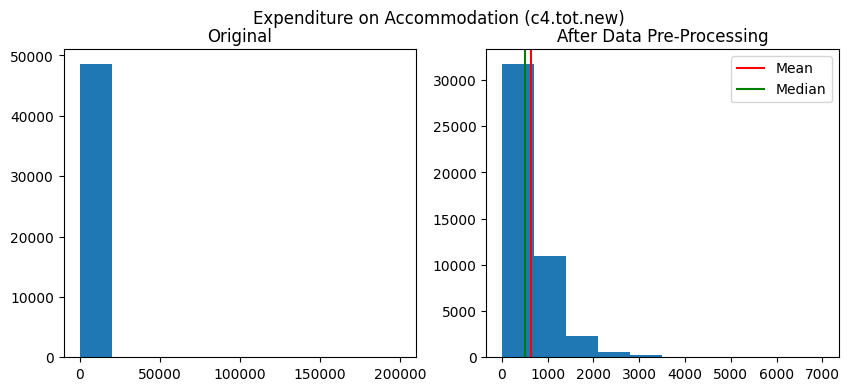

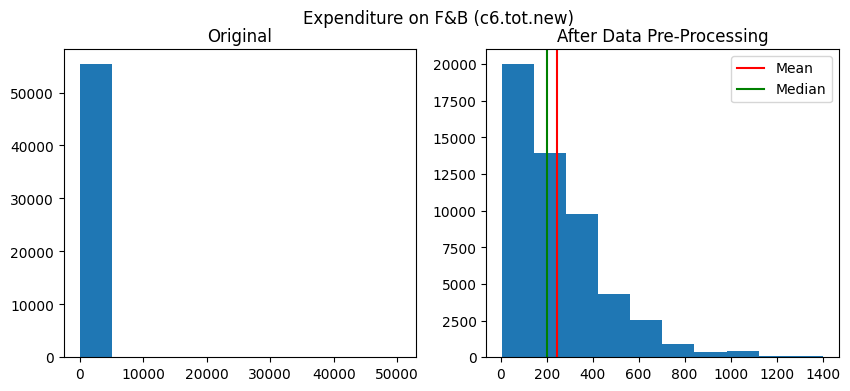

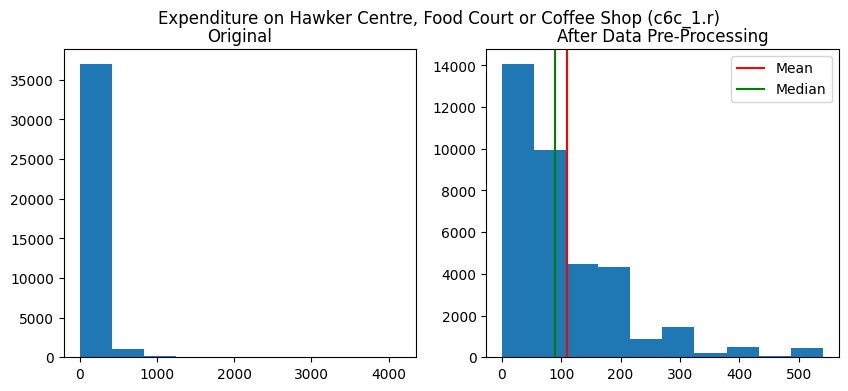

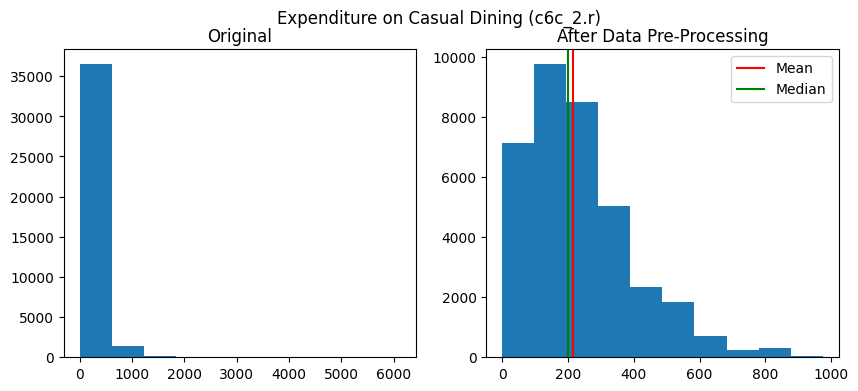

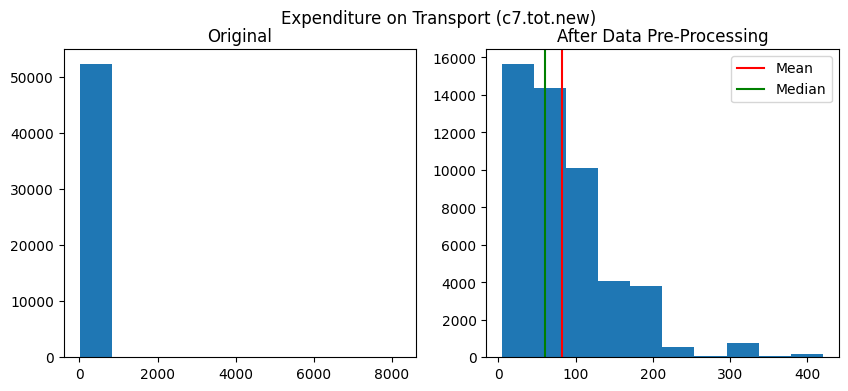

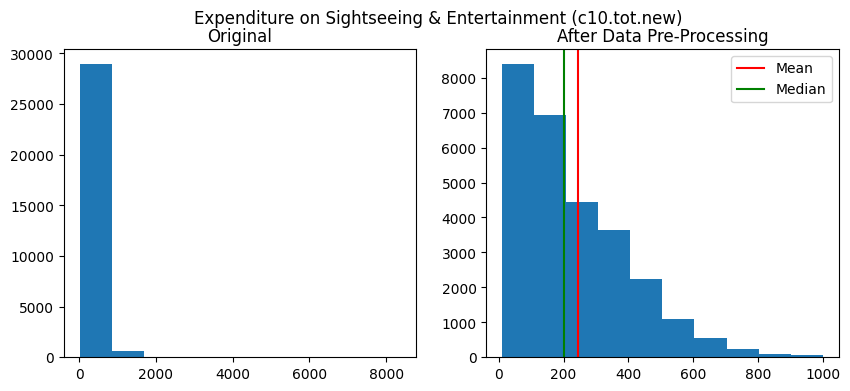

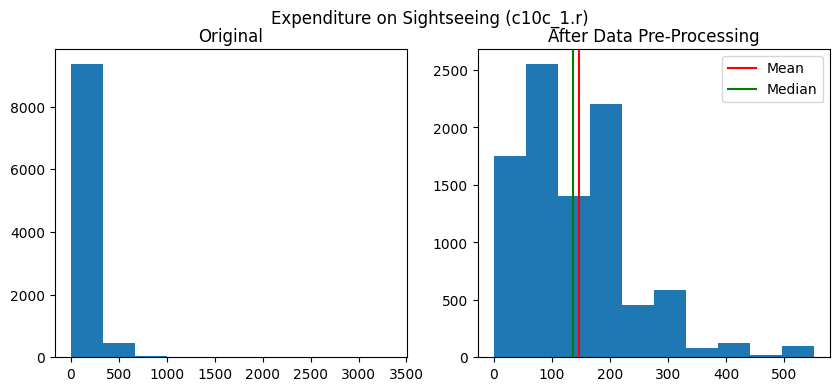

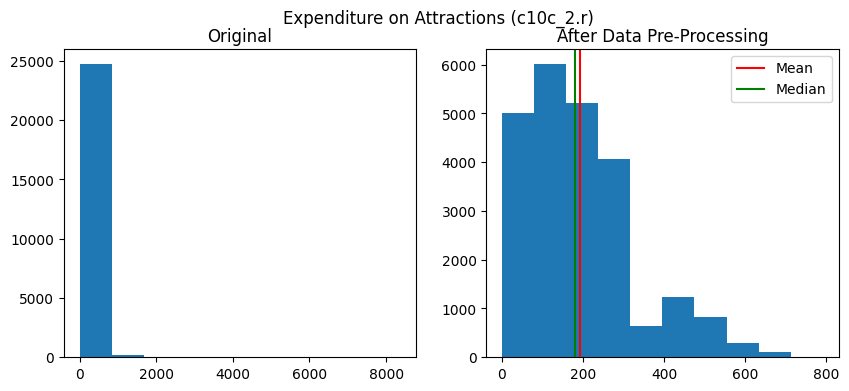

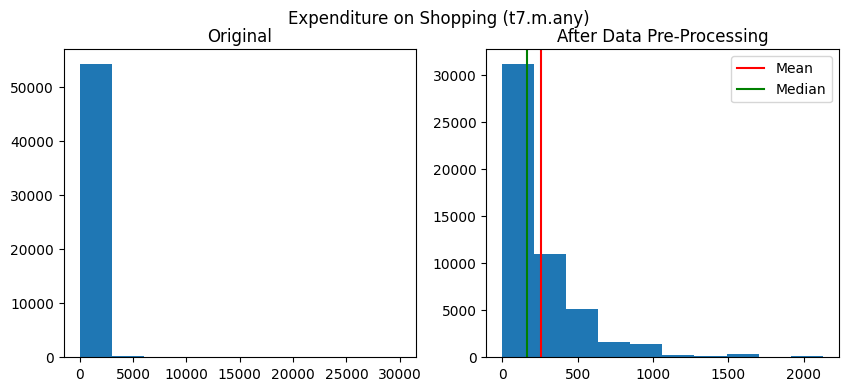

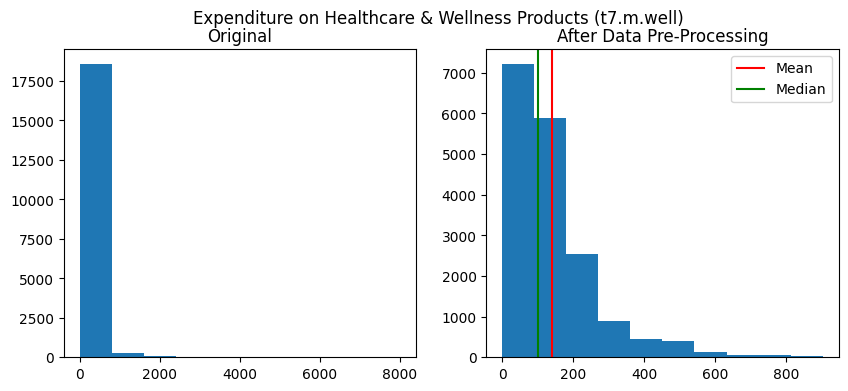

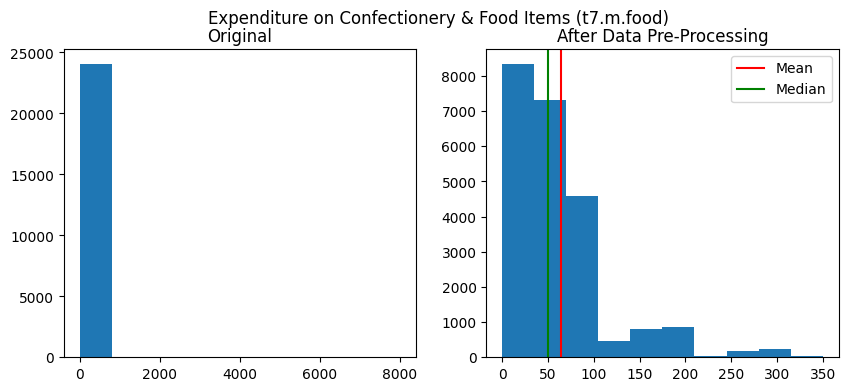

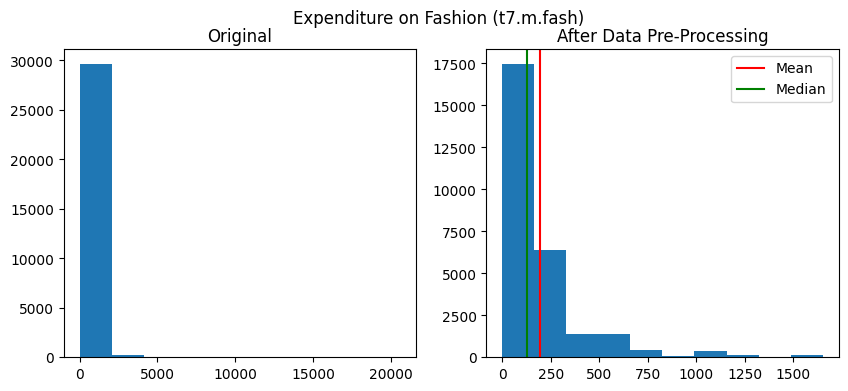

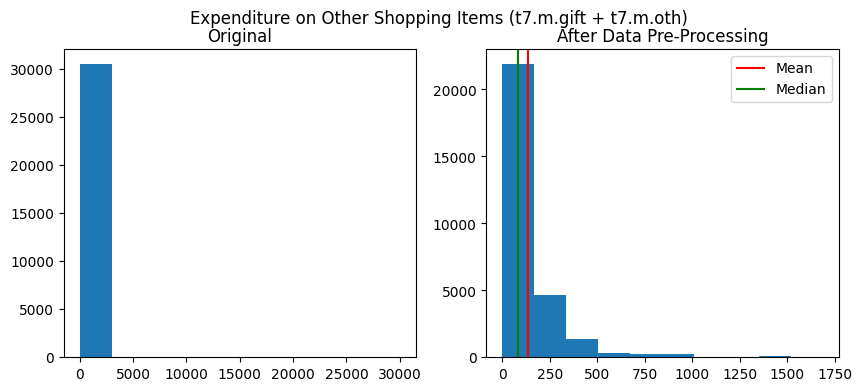

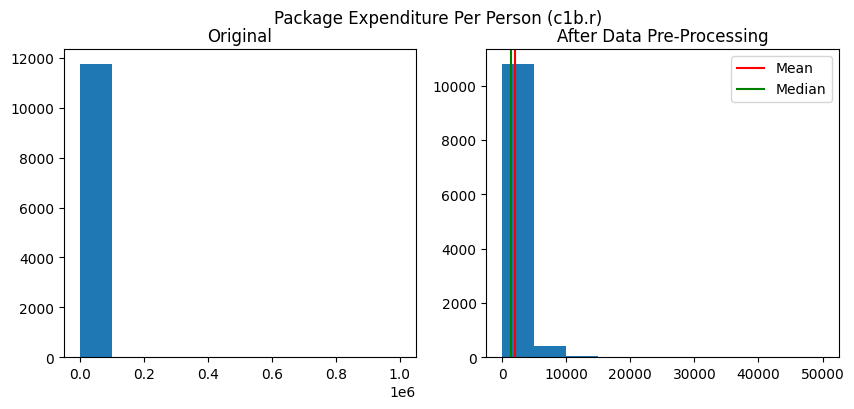

In [23]:
# Comparison of distributions before and after data pre-processing
plot_hist(newOVS1618, cleaned_OVS1618, list_expnd)

#### VARIABLES TO REMOVE BEFORE TRAINING

In [24]:
# Drop irrelevant columns, i.e. first 3 columns
training_OVS1618 = cleaned_OVS1618.drop(columns=['respondent_id', 'outlier', 'dummy'])

# Drop outdated variables
training_OVS1618 = training_OVS1618.drop(columns=['c4.tot', 'c6.tot', 'c7.tot', 'c10.tot'])

# Drop inaccurate variable
training_OVS1618 = training_OVS1618.drop(columns=['c3.r'])

In [25]:
continuous_variables = [x for x in training_OVS1618.columns.tolist() if x not in categorical_variables]

In [26]:
# Write list of categorical variables to a .txt file
with open(os.path.join(cwd + '/Real Data/categorical_columns.txt'), 'w') as filehandle:
    for var in categorical_variables:
            filehandle.write('%s\n' % var)

# Write list of continuous variables to a .txt file
with open(os.path.join(cwd + '/Real Data/continuous_columns.txt'), 'w') as filehandle:
    for var in continuous_variables:
            filehandle.write('%s\n' % var)

In [27]:
training_OVS1618.shape

(66030, 259)

- training_OVS1618 is our training data.
- Next step is to add indicator columns as replace NA valus by -1

# Add indicator columns

In [28]:
# Add binary categorical column ('_cat') for each benchmark that contains NA values; 1 if NA, 0 is non-NA
def na_indicator(df, list_cols, replace):
    '''
    Inserts a binary categorical column to indicate if a variable contains NA values.
    
    Args:
        df (DataFrame): dataframe to perform function on
        list_cols (list): list of columns
        replace (integer): an integer to replace NA values, e.g. 0, -1, -999
        
    Returns:
        df_new (DataFrame): dataframe with the indicator columns added next to its respective columns, and NA values replaced
        new_cat_col (list): list of all binary categorical columns
    '''
    df_new = df.copy()
    new_cat_col = []
    for col in list_cols:
        if True in list(df_new[col].isnull()):
            
            # Binary categorical column to track NA values
            indicator_col = df_new[col].apply(lambda x: 1 if pd.isnull(x) else 0)
            # Append binary column right beside
            df_new.insert(df_new.columns.get_loc(col)+1, col+'_cat', indicator_col)
            
            # Replace NA values
            df_new[col] = df_new[col].fillna(replace)
            
            # Save newly created binary categorical column in a list
            new_cat_col.append(col+'_cat')
    
    # Write df_new to a csv file
    df_new.to_csv(cwd + r'/Real Data/OVS1618v5_'+ str(replace) + '.csv', index=False, header=True)
    # Write new_cat_col to a text file
    with open(os.path.join(cwd + r'/Real Data/binary_categorical_columns.txt'), 'w') as filehandle:
        for var in new_cat_col:
            filehandle.write('%s\n' % var)
            
    return df_new, new_cat_col

In [29]:
OVS1618_final, cat_list  = na_indicator(training_OVS1618, continuous_variables, -1)

In [30]:
discrete_cols = categorical_variables + cat_list

In [31]:
with open(os.path.join(cwd + '/Real Data/discrete.txt'), 'w') as filehandle:
    for var in discrete_cols:
            filehandle.write('%s\n' % var)